In [1]:
#insert file name in place of 'DataFinal.csv' 
import pandas as pd
file= pd.read_csv('DataFinal.csv')
df=file.copy()
feat_names=['equity', 'tech', 'bonds', 'gold', 'buyer']
df.columns = df.columns[:8].tolist() + feat_names

In [48]:
# Libraries 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['font.size'] =13
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
pd.set_option('mode.chained_assignment', None)
sns.set_palette('flare')
from scipy import stats
from matplotlib import pyplot




----
### EDA

In [3]:
df

Feat0  Feat1  Feat2 Feat3  Feat4  Feat5  Feat6  Feat7  equity  tech  \
0     0.275522      1   2.77     D   0.99    6.0     89      3      46     7   
1     0.365429      1   4.75     D   0.64    3.0     81      2      27     7   
2     0.284353      0   6.95     B   0.34    7.0     93      1      29     0   
3     0.356867      1   2.87     D   0.80    5.0     39      3      61     7   
4     0.462896      0   2.81     A   0.82    4.0      5      3      75     4   
...        ...    ...    ...   ...    ...    ...    ...    ...     ...   ...   
1495  0.982060      1   0.18     D   0.60    7.0     60      1      76     3   
1496  0.007300      0   4.76     A   0.76    1.0     82      3      16     4   
1497  0.815421      0   4.75     A   0.90    5.0     61      2      77     0   
1498  0.022409      1   7.86     D   0.56    8.0     35      2      90     2   
1499  0.448355      0   8.17     B   0.12    0.0     16      2      58     3   

      bonds  gold  buyer  
0       468    10      0  
1         4     1      1  
2       933     7      0  
3       254     2      0  
4       805     7      0  
...     ...   ...    ...  
1495    273    10      0  
1496    932     7      0  
1497    385     4      1  
1498    131     7      0  
1499     31     7      0  

[1500 rows x 13 columns]

array([[<AxesSubplot:title={'center':'Feat0'}>,
        <AxesSubplot:title={'center':'Feat1'}>,
        <AxesSubplot:title={'center':'Feat2'}>],
       [<AxesSubplot:title={'center':'Feat4'}>,
        <AxesSubplot:title={'center':'Feat5'}>,
        <AxesSubplot:title={'center':'Feat6'}>],
       [<AxesSubplot:title={'center':'Feat7'}>,
        <AxesSubplot:title={'center':'equity'}>,
        <AxesSubplot:title={'center':'tech'}>],
       [<AxesSubplot:title={'center':'bonds'}>,
        <AxesSubplot:title={'center':'gold'}>,
        <AxesSubplot:title={'center':'buyer'}>]], dtype=object)

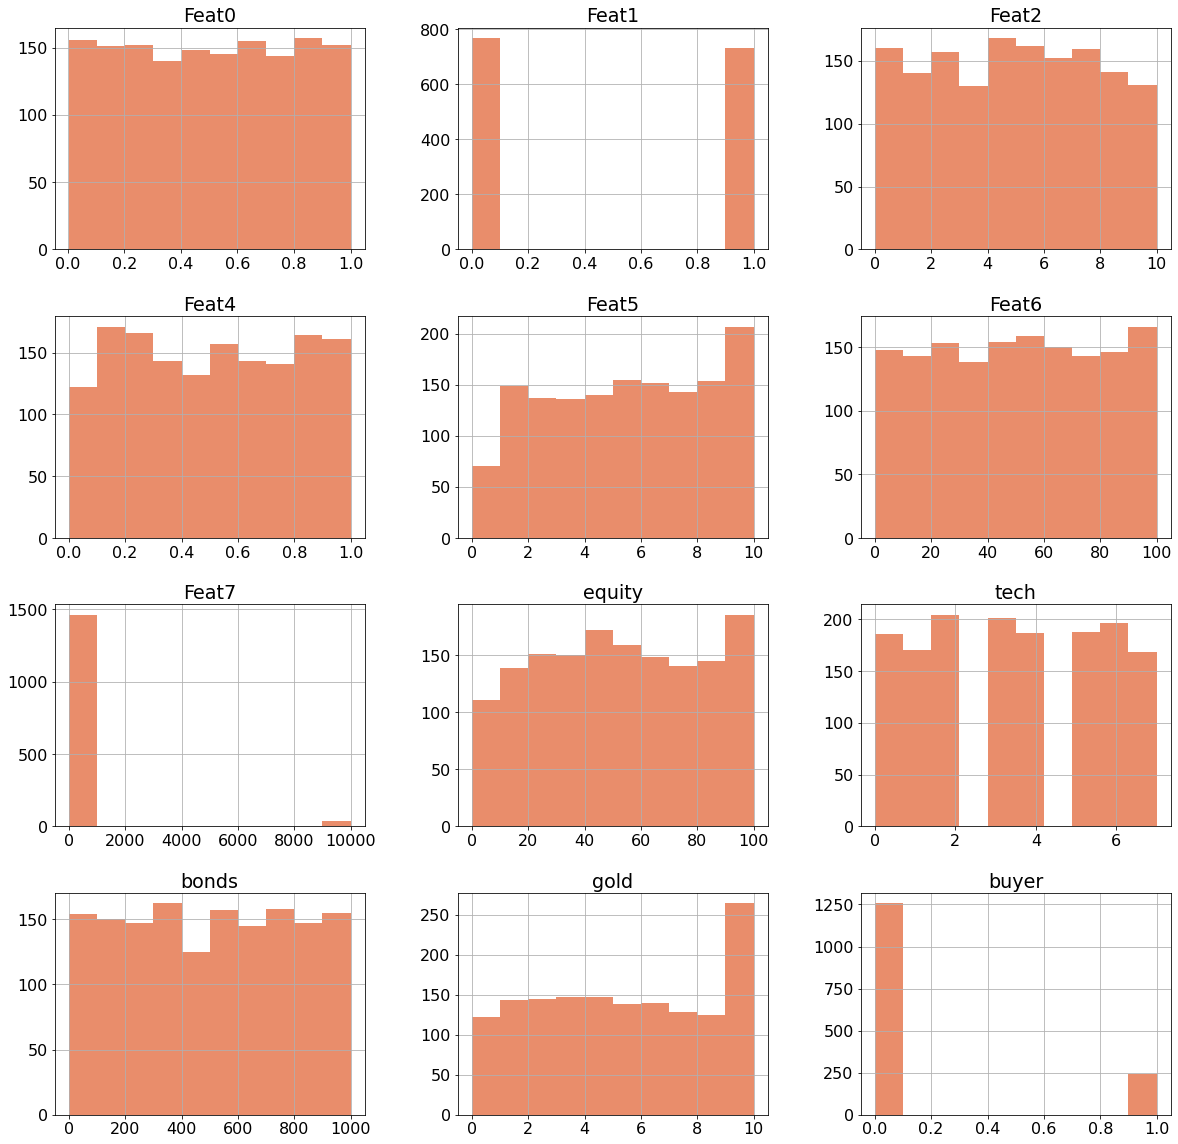

In [4]:
# want to inspect ditributions for later
df.hist(bins=10, figsize=(20,20))

In [5]:
Target=['buyer']
Features=(list(df.columns))
Features.remove(Target[0])
df[Features].corr()
np.sum(abs(df[Features].corr()) >= 0.5)
#No Feature Redundancy, the only values where absolute corr between features is >0.5 is the feature itself

Feat0     1
Feat1     1
Feat2     1
Feat4     1
Feat5     1
Feat6     1
Feat7     1
equity    1
tech      1
bonds     1
gold      1
dtype: int64

------
### Encoding

In [6]:
#encoding Feat 3 since it's non-numerical 

encFeat3 = LabelEncoder()
df['Feat3'] = (encFeat3.fit_transform(df['Feat3']))

----------
### Missing Values

In [7]:
# inspect amount of missing values in the dataset

def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns
    
missing_values = missing_values_table(df)
missing_values

Missing Values  % of Total Values
Feat5              57                3.8

In [8]:
#filling missing values with the mode since the feature seems to be categorical 
df=df.fillna(value=float(df.Feat5.mode()))

In [9]:
np.sum(pd.isna(df))

Feat0     0
Feat1     0
Feat2     0
Feat3     0
Feat4     0
Feat5     0
Feat6     0
Feat7     0
equity    0
tech      0
bonds     0
gold      0
buyer     0
dtype: int64

----------
### Outliers

<AxesSubplot:>

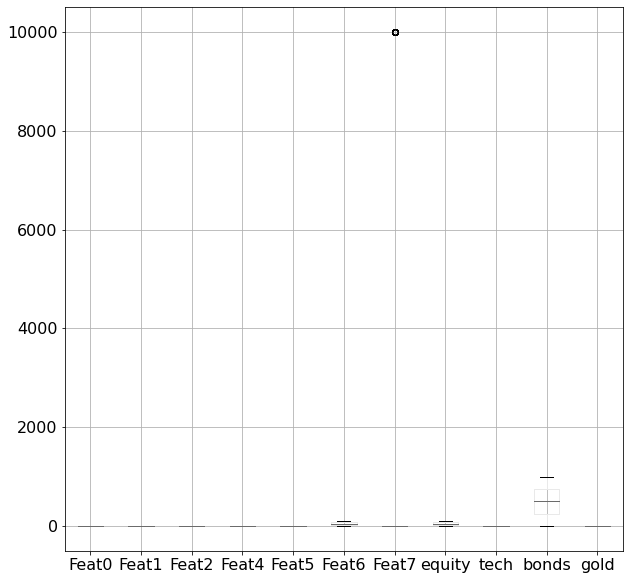

In [10]:
cols = ['Feat0','Feat1', 'Feat2', 'Feat4','Feat5','Feat6', 'Feat7','equity','tech','bonds','gold'] # one or more
df.boxplot(column=cols)

In [11]:
#seems that feat 7 has outliers 
df['Feat7'].value_counts()

3       378
1       368
0       368
2       346
9999     40
Name: Feat7, dtype: int64

In [12]:
#removing outliers with interquantile range method 

from scipy import stats

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<AxesSubplot:>

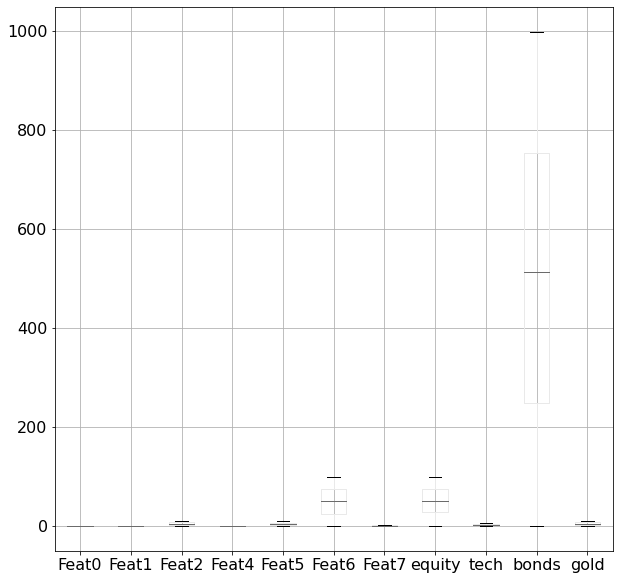

In [13]:
df.boxplot(column=cols)

In [14]:
df

Feat0  Feat1  Feat2  Feat3  Feat4  Feat5  Feat6  Feat7  equity  tech  \
0     0.275522      1   2.77      2   0.99    6.0     89      3      46     7   
1     0.365429      1   4.75      2   0.64    3.0     81      2      27     7   
2     0.284353      0   6.95      1   0.34    7.0     93      1      29     0   
3     0.356867      1   2.87      2   0.80    5.0     39      3      61     7   
4     0.462896      0   2.81      0   0.82    4.0      5      3      75     4   
...        ...    ...    ...    ...    ...    ...    ...    ...     ...   ...   
1495  0.982060      1   0.18      2   0.60    7.0     60      1      76     3   
1496  0.007300      0   4.76      0   0.76    1.0     82      3      16     4   
1497  0.815421      0   4.75      0   0.90    5.0     61      2      77     0   
1498  0.022409      1   7.86      2   0.56    8.0     35      2      90     2   
1499  0.448355      0   8.17      1   0.12    0.0     16      2      58     3   

      bonds  gold  buyer  
0       468    10      0  
1         4     1      1  
2       933     7      0  
3       254     2      0  
4       805     7      0  
...     ...   ...    ...  
1495    273    10      0  
1496    932     7      0  
1497    385     4      1  
1498    131     7      0  
1499     31     7      0  

[1460 rows x 13 columns]

--------
### Unbalanced Target Variable

In [15]:
train, test = train_test_split(df, test_size=0.3, random_state=8)

In [16]:
#the target seems to be unbalanced 

train.buyer.value_counts()

0    851
1    171
Name: buyer, dtype: int64

In [17]:
# Class count
count_class_0, count_class_1 = train.buyer.value_counts()

# Divide by class
df_class_0 = train[train['buyer'] == 0]
df_class_1 = train[train['buyer'] == 1]

In [18]:
#oversampling the minority class after train and test split so that test set does not have same observations as train set.

df_class_1_over = df_class_1.sample(count_class_0, replace=True, random_state=8)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(df_test_over.buyer.value_counts())

0    851
1    851
Name: buyer, dtype: int64


In [19]:
train= df_test_over

In [20]:
train.astype(int)
train['Feat5']=train['Feat5'].round()

In [21]:
train.buyer.value_counts()

0    851
1    851
Name: buyer, dtype: int64

-------
### Linearity


In [22]:
train.head()

Feat0  Feat1  Feat2  Feat3  Feat4  Feat5  Feat6  Feat7  equity  tech  \
997   0.892805      1   9.92      0   0.11    3.0     80      0      37     3   
278   0.160456      1   1.35      2   0.78    5.0     56      0      89     2   
391   0.874480      1   9.61      1   0.28    9.0     37      2      46     0   
570   0.598709      1   5.61      2   0.47    0.0     65      2      14     3   
1106  0.573181      1   5.39      2   0.16    1.0      9      2      50     6   

      bonds  gold  buyer  
997     317     2      0  
278     627     9      0  
391     929     8      0  
570     195     9      0  
1106    341     1      0

In [23]:
#DOES NOT MAKE MUCH SENSE TO COMPUTE CORRELATION BECAUSE OF CATEGORICAL TARGET 
corr_matrix=train.corr()
corr_matrix["buyer"].sort_values(ascending=False)

buyer     1.000000e+00
Feat5     2.579255e-01
equity    1.891933e-01
Feat2     1.004802e-01
tech      7.289892e-02
Feat6     3.737654e-02
Feat4     1.373728e-02
Feat3     1.224639e-02
Feat0     1.090979e-02
Feat1    -3.092178e-16
Feat7    -8.267839e-02
bonds    -8.372176e-02
gold     -5.344441e-01
Name: buyer, dtype: float64

<AxesSubplot:xlabel='Feat7', ylabel='buyer'>

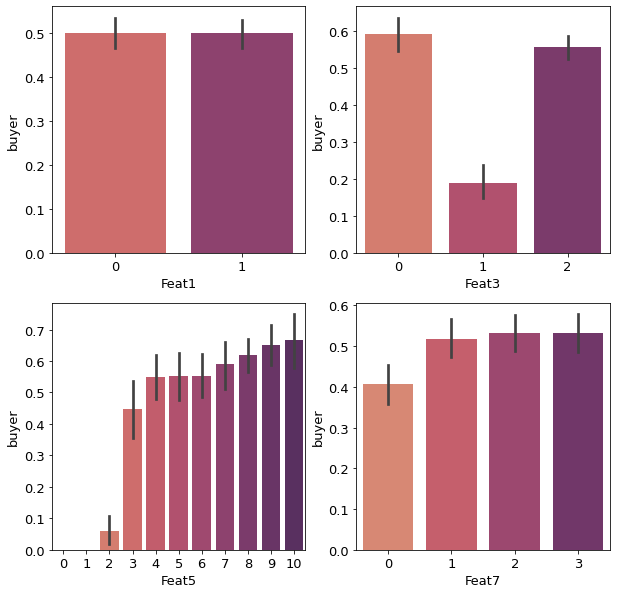

<Figure size 2400x2400 with 0 Axes>

In [49]:
fig, axs = plt.subplots(2,2)
figure(figsize=(30, 30), dpi=80)

sns.barplot(x='Feat1', y='buyer', data=train, ax=axs[0,0],palette="flare")
sns.barplot(x='Feat3', y='buyer', data=train, ax=axs[0,1],palette="flare")
sns.barplot(x='Feat5', y='buyer', data=train, ax=axs[1,0],palette="flare")
sns.barplot(x='Feat7', y='buyer', data=train, ax=axs[1,1],palette="flare")



<AxesSubplot:xlabel='Feat7', ylabel='buyer'>

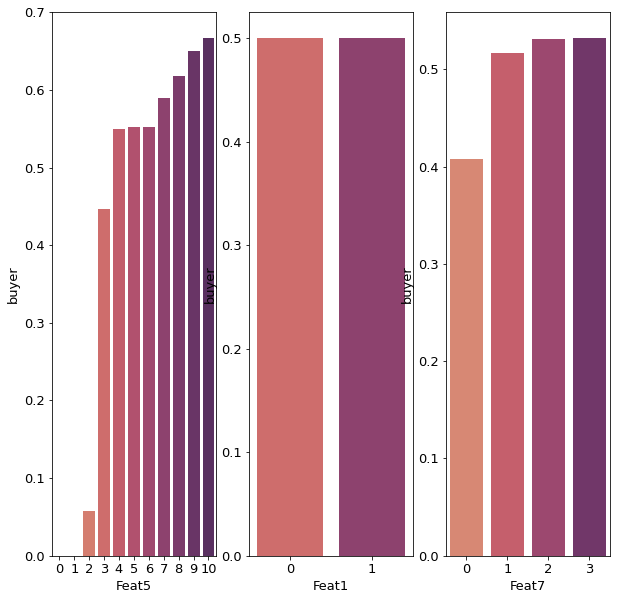

<Figure size 2400x1600 with 0 Axes>

In [50]:
fig, axs = plt.subplots(1,3)
figure(figsize=(30, 20), dpi=80)

feat5set = train.groupby('Feat5').mean()
feat5set = feat5set.sort_values(ascending = True , by='buyer')
feat5set['MapTo'] = np.arange(len(feat5set))
feat5dict= feat5set['MapTo'].to_dict()
sns.barplot(ax = axs[0], x=feat5set.index, y=feat5set['buyer'],palette="flare", data=feat5set, order=feat5set.index)

feat1set = train.groupby('Feat1').mean()
feat1set = feat1set.sort_values(ascending = True , by='buyer')
feat1set['MapTo'] = np.arange(len(feat1set))
feat1dict= feat1set['MapTo'].to_dict()
sns.barplot(ax=axs[1], x=feat1set.index, y=feat1set['buyer'],palette="flare", data=feat1set, order=feat1set.index)

feat7set = train.groupby('Feat7').mean()
feat7set = feat7set.sort_values(ascending = True , by='buyer')
feat7set['MapTo'] = np.arange(len(feat7set))
feat7dict= feat7set['MapTo'].to_dict()
sns.barplot(ax=axs[2], x=feat7set.index, y=feat7set['buyer'],palette="flare", data=feat7set, order=feat7set.index)



In [26]:
train['Feat1'] = train['Feat1'].map(feat1dict)
train['Feat5'] = train['Feat5'].map(feat5dict)
train['Feat7'] = train['Feat7'].map(feat7dict)
train.head()

Feat0  Feat1  Feat2  Feat3  Feat4  Feat5  Feat6  Feat7  equity  tech  \
997   0.892805      1   9.92      0   0.11      5     80      2      37     3   
278   0.160456      1   1.35      2   0.78      8     56      2      89     2   
391   0.874480      1   9.61      1   0.28      3     37      1      46     0   
570   0.598709      1   5.61      2   0.47      0     65      1      14     3   
1106  0.573181      1   5.39      2   0.16      2      9      1      50     6   

      bonds  gold  buyer  
997     317     2      0  
278     627     9      0  
391     929     8      0  
570     195     9      0  
1106    341     1      0

In [27]:
corr_matrix=train.corr()
corr_matrix["buyer"].sort_values(ascending=False)

buyer     1.000000e+00
Feat5     3.572969e-01
equity    1.891933e-01
Feat2     1.004802e-01
Feat7     8.321635e-02
tech      7.289892e-02
Feat6     3.737654e-02
Feat4     1.373728e-02
Feat3     1.224639e-02
Feat0     1.090979e-02
Feat1    -3.092178e-16
bonds    -8.372176e-02
gold     -5.344441e-01
Name: buyer, dtype: float64

--------
### Scaling and Logisitc Regression

In [28]:
#Creating X (variables) and y (target) matrices for train and test

xtrain= train.loc[:, train.columns != 'buyer']
ytrain= train['buyer']
xtest= test.loc[:, test.columns != 'buyer']
ytest= test['buyer']

In [29]:
#Scaling Variables with Standars Scaler 

#SURPLRISINGLY, STANDARD SCALER GIVES BETTERE RESUSLTS THAN MINMAXSCALER EVEN THOUGH VARIABLES SEEM UNIVFORMLY DISTRIBUTED, 

cols = ['Feat0','Feat1', 'Feat2','Feat3', 'Feat4','Feat5','Feat6', 'Feat7','equity','tech','bonds','gold'] 
scaler = StandardScaler()
xtrain[cols]= scaler.fit_transform(xtrain[cols])
xtest[cols]= scaler.transform(xtest[cols])
xtrain_sc=xtrain
xtest_sc=xtest

In [30]:
#Checking consistency in dimensionality
print(xtrain.shape,xtrain_sc.shape)
print(xtest.shape,xtest_sc.shape)
print(ytrain.shape, ytest.shape)


(1702, 12) (1702, 12)
(438, 12) (438, 12)
(1702,) (438,)


In [31]:
#Fitting Logistic Regression

log_reg = LogisticRegression(solver='liblinear', C=0.01)
print(log_reg.fit(xtrain_sc, ytrain))

LogisticRegression(C=0.01, solver='liblinear')


In [32]:
# Predict Proba and AUC as metric

from sklearn.metrics import roc_auc_score
lr_train = log_reg.predict_proba(xtrain_sc)[:, 1]
lr_test = log_reg.predict_proba(xtest)[:, 1]
print('train:', roc_auc_score(ytrain, lr_train))
print('test:', roc_auc_score(ytest, lr_test))

train: 0.8805580218751423
test: 0.7916259367872271


In [33]:
# Predict and Accuracy as metric

from sklearn.metrics import accuracy_score
lr_train2 = log_reg.predict(xtrain_sc)
lr_test2 = log_reg.predict(xtest)
print(accuracy_score(ytrain,lr_train2))
print(accuracy_score(ytest,lr_test2))

0.8066980023501763
0.7031963470319634


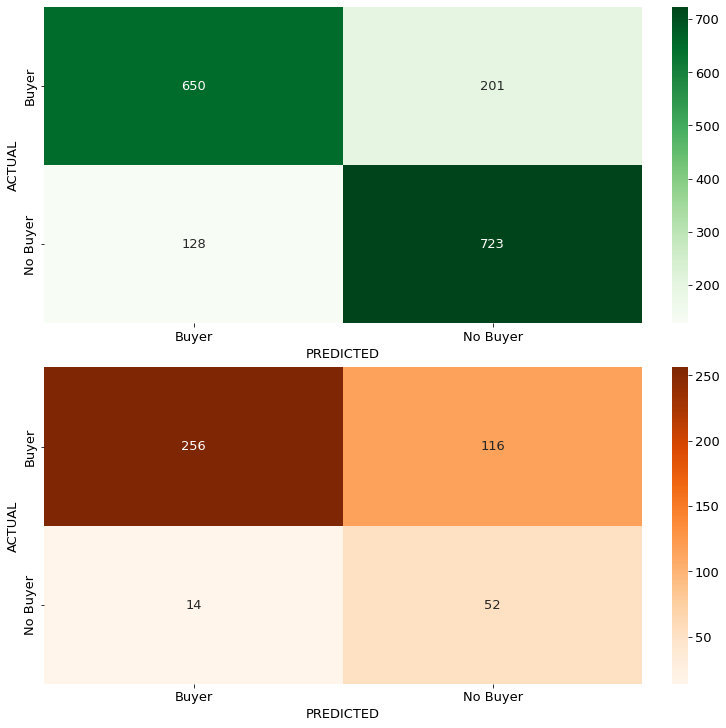

In [51]:
from sklearn.metrics import confusion_matrix
fig, axs= plt.subplots(2, constrained_layout=True)


cm_train=confusion_matrix(ytrain, lr_train2) 
cm_test=confusion_matrix(ytest, lr_test2)

labels=['Buyer','No Buyer']

df_cm=pd.DataFrame(cm_train, columns=labels, index=labels)
df_cm.index.name = 'ACTUAL'
df_cm.columns.name = 'PREDICTED'

df_cm2=pd.DataFrame(cm_test, columns=labels, index=labels)
df_cm2.index.name = 'ACTUAL'
df_cm2.columns.name = 'PREDICTED'

snsFig=sns.heatmap(df_cm, ax=axs[0], cmap="Greens", annot=True,  fmt='g')
snsFig=sns.heatmap(df_cm2, ax=axs[1], cmap="Oranges", annot=True,  fmt='g')


-------
### K-Nearest Neighbors

In [35]:
from sklearn import neighbors
#Train Performance
for k in range(1,15):

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(xtrain_sc,ytrain)
    y_pred = kNN.predict(xtrain_sc)
    
    # compute Accuracy
    acc = accuracy_score(y_true=ytrain, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

k:  1 | Accuracy 1.000
k:  2 | Accuracy 0.998
k:  3 | Accuracy 0.945
k:  4 | Accuracy 0.946
k:  5 | Accuracy 0.891
k:  6 | Accuracy 0.895
k:  7 | Accuracy 0.868
k:  8 | Accuracy 0.877
k:  9 | Accuracy 0.852
k: 10 | Accuracy 0.863
k: 11 | Accuracy 0.841
k: 12 | Accuracy 0.843
k: 13 | Accuracy 0.834
k: 14 | Accuracy 0.843


In [36]:
#Test Performance
for k in range(1,15):

    kNN = neighbors.KNeighborsClassifier(n_neighbors=k)
    kNN.fit(xtrain_sc,ytrain)
    y_pred = kNN.predict(xtest)
    
    # compute Accuracy
    acc = accuracy_score(y_true=ytest, y_pred=y_pred)
    print ("k: {:2d} | Accuracy {:.3f}".format(k,acc) )

k:  1 | Accuracy 0.797
k:  2 | Accuracy 0.801
k:  3 | Accuracy 0.724
k:  4 | Accuracy 0.728
k:  5 | Accuracy 0.685
k:  6 | Accuracy 0.715
k:  7 | Accuracy 0.651
k:  8 | Accuracy 0.671
k:  9 | Accuracy 0.628
k: 10 | Accuracy 0.671
k: 11 | Accuracy 0.639
k: 12 | Accuracy 0.674
k: 13 | Accuracy 0.646
k: 14 | Accuracy 0.655


-------
### Linear and Non-Linear SVM

In [37]:
#linear support vector machine 
from sklearn.svm import LinearSVC
for c in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    svc_reg = LinearSVC(C = c)
    svc_reg.fit(xtrain_sc, ytrain)
    svc_reg_pred = svc_reg.predict(xtest)
    print('C:',c, 'Test accuracy=',accuracy_score(y_true = ytest, y_pred=svc_reg_pred))

C: 0.001 Test accuracy= 0.684931506849315
C: 0.01 Test accuracy= 0.7031963470319634
C: 0.1 Test accuracy= 0.7054794520547946
C: 1.0 Test accuracy= 0.7054794520547946
C: 10.0 Test accuracy= 0.7054794520547946


/Users/pietrobellamio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/pietrobellamio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


C: 100.0 Test accuracy= 0.6301369863013698
C: 1000.0 Test accuracy= 0.5730593607305936


/Users/pietrobellamio/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
#non linear support vector machine 
from sklearn.svm import SVC
for c in [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]:
    svc_reg = SVC(C = c, probability=False)
    svc_reg.fit(xtrain_sc, ytrain)
    svc_reg_pred = svc_reg.predict(xtest)
    print('C:',c, 'Test accuracy=',accuracy_score(y_true = ytest, y_pred=svc_reg_pred))

C: 0.001 Test accuracy= 0.682648401826484
C: 0.01 Test accuracy= 0.682648401826484
C: 0.1 Test accuracy= 0.726027397260274
C: 1.0 Test accuracy= 0.8333333333333334
C: 10.0 Test accuracy= 0.8744292237442922
C: 100.0 Test accuracy= 0.863013698630137
C: 1000.0 Test accuracy= 0.863013698630137


------
### Decision Tree and Random Forest

In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


model = DecisionTreeClassifier(random_state=8)
model2 = RandomForestClassifier(random_state=8, n_estimators =100)

model.fit(xtrain_sc,ytrain)
model2.fit(xtrain_sc,ytrain)

RandomForestClassifier(random_state=8)

In [40]:
dt_train=model.predict(xtrain_sc)
dt_test=model.predict(xtest)

rf_train=model2.predict(xtrain_sc)
rf_test=model2.predict(xtest)

In [41]:
cm1=confusion_matrix(ytrain, dt_train)
cm2=confusion_matrix(ytest, dt_test)

cm3=confusion_matrix(ytrain, rf_train)
cm4=confusion_matrix(ytest, rf_test)

dt train: 1.0
dt test: 0.9611872146118722
rf train: 1.0
rf test: 0.9657534246575342


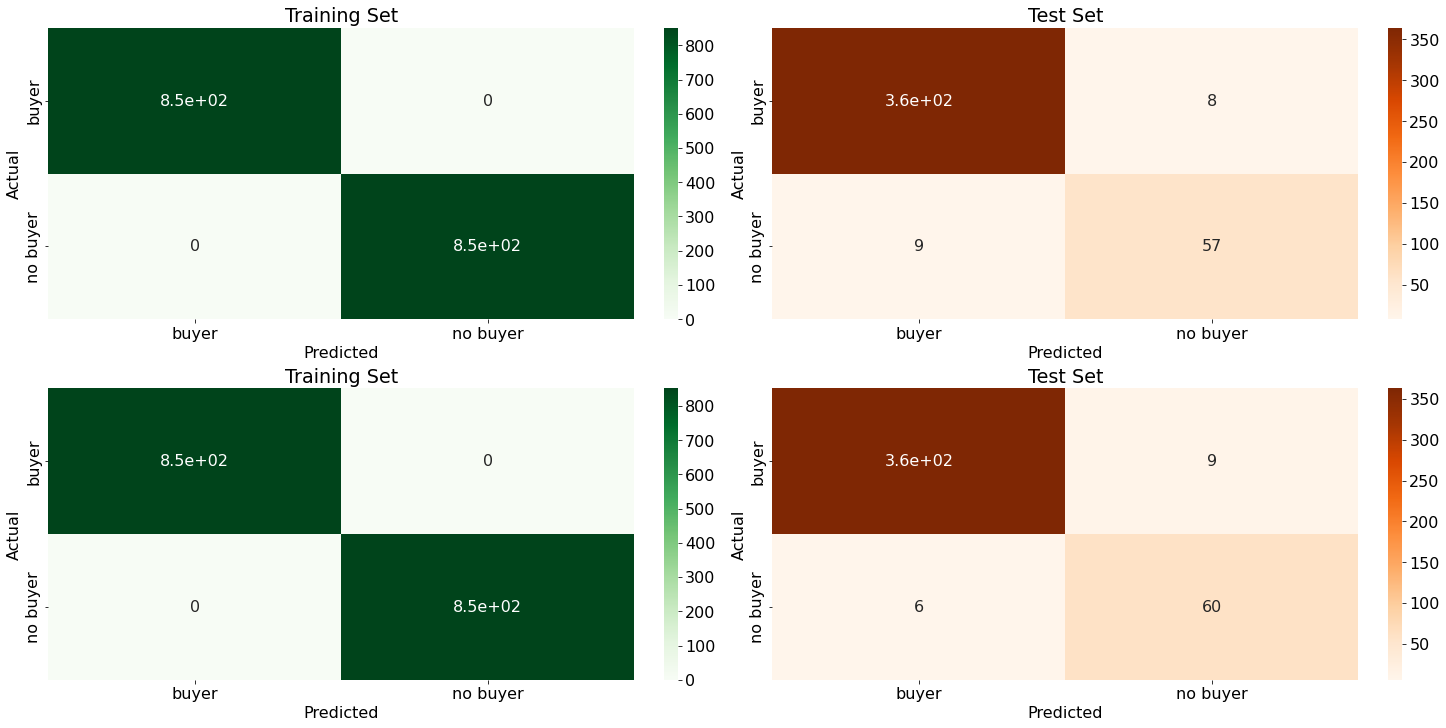

In [42]:
labels=['buyer', 'no buyer']

df_cm1=pd.DataFrame(cm1, columns=labels, index=labels)
df_cm1.index.name='Actual'
df_cm1.columns.name='Predicted'

df_cm2=pd.DataFrame(cm2, columns=labels, index=labels)
df_cm2.index.name='Actual'
df_cm2.columns.name='Predicted'

df_cm3=pd.DataFrame(cm3, columns=labels, index=labels)
df_cm3.index.name='Actual'
df_cm3.columns.name='Predicted'

df_cm4=pd.DataFrame(cm4, columns=labels, index=labels)
df_cm4.index.name='Actual'
df_cm4.columns.name='Predicted'

fig, [[ax1, ax2],[ax3, ax4]] = plt.subplots(nrows=2, ncols=2,constrained_layout=True, figsize = (20,10))
snFig=sns.heatmap(df_cm1, ax=ax1, cmap="Greens", annot=True)
snFig=sns.heatmap(df_cm2, ax=ax2, cmap="Oranges", annot=True)
snFig=sns.heatmap(df_cm3, ax=ax3, cmap="Greens", annot=True)
snFig=sns.heatmap(df_cm4, ax=ax4, cmap="Oranges", annot=True)
ax1.title.set_text('Training Set')
ax2.title.set_text('Test Set')
ax3.title.set_text('Training Set')
ax4.title.set_text('Test Set')

print('dt train:',accuracy_score(ytrain,dt_train))
print('dt test:', accuracy_score(ytest,dt_test))
print('rf train:', accuracy_score(ytrain,rf_train))
print('rf test:', accuracy_score(ytest,rf_test))



-----
### Feature Importance and feature selection

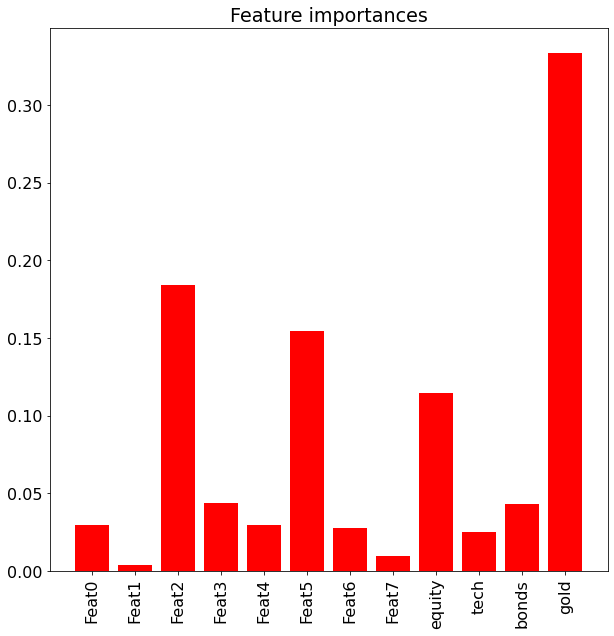

In [43]:
plt.figure()
plt.title("Feature importances")
plt.bar(Features, model2.feature_importances_, color="r", align="center")
plt.xticks(rotation=90)
plt.show()

In [44]:
#ordering feature importances 
import operator
k=dict(zip(Features,model2.feature_importances_))
k = sorted(k.items(),key=operator.itemgetter(1),reverse=False)
k

[('Feat1', 0.003998921724149484),
 ('Feat7', 0.010067573149255658),
 ('tech', 0.025183877325532622),
 ('Feat6', 0.027810953353493293),
 ('Feat4', 0.02957564924955356),
 ('Feat0', 0.029790044773965314),
 ('bonds', 0.04324080358571624),
 ('Feat3', 0.04370851442137964),
 ('equity', 0.11489597334699793),
 ('Feat5', 0.15438212073416296),
 ('Feat2', 0.18414034896158085),
 ('gold', 0.3332052193742124)]

In [45]:
#least amount features to achieve at least 70% accuracy? dropping least important feature at each iteration and fit-predict the random forest again, if the model 
#without the feature scores >70% accuracy then procede to drop the next least important feature and so on up until accuracy drops  below 70%

featlist=[]
traincopy= xtrain.copy()
testcopy= xtest.copy()

for feat in k: 
    traincopy=traincopy.drop(str(feat[0]), axis=1)
    testcopy=testcopy.drop(str(feat[0]), axis=1)
    model2.fit(traincopy,ytrain)
    rf_test=model2.predict(testcopy)
    acc= accuracy_score(ytest,rf_test)
    if float(acc)>= 0.7:
        featlist.append(feat[0])
        continue
    if float(acc) < 0.7:
        traincopy[str(feat[0])] = xtrain[str(feat[0])] 
        testcopy[str(feat[0])] = xtest[str(feat[0])]
        print('To maintain 70% accuracy using a random forest we can delete:\n',featlist)
        model2.fit(traincopy,ytrain)
        rf_test=model2.predict(testcopy)
        acc=accuracy_score(ytest,rf_test)
        print('\n')
        print('The model with the remaining Features achieves:',acc , 'accuracy on test')
        break

    
    

To maintain 70% accuracy using a random forest we can delete:
 ['Feat1', 'Feat7', 'tech', 'Feat6', 'Feat4', 'Feat0', 'bonds', 'Feat3', 'equity', 'Feat5']


The model with the remaining Features achieves: 0.8356164383561644 accuracy on test
